In [1]:
import pandas as pd
import numpy as np

In [2]:
event_data = pd.read_csv("../apps/backend/data/sensor_read_events.csv")
event_data

,event_id,sensor_id,event_ts,temperature,humidity,light_intensity,earth_moisture
0,e82cf33e-7184-4900-9f6d-82a2d2a16072,1,2023-03-09T07:01:34+0700,22.7,51.0,0.0,0.0
1,0233575a-c57e-4de8-93e5-fd266c485f99,2,2023-03-09T07:01:34+0700,19.7,76.0,0.0,0.0
2,ceb41950-aca1-43c0-b9c3-a4652e23eadf,1,2023-03-09T07:01:38+0700,22.6,50.9,0.0,0.0
3,7b4c74d1-e161-4413-a12d-e370c4429f69,3,2023-03-09T07:01:39+0700,27.0,76.8,1.0,0.0
4,bb2ceb7e-4a43-4049-9f45-9ceaa413d552,1,2023-03-09T07:01:41+0700,22.6,50.9,0.0,0.0
...,...,...,...,...,...,...,...
405179,2630cb65-c13f-41ba-8514-216d50def61b,2,2023-03-17T07:03:33+0700,19.2,75.3,0.0,0.0
405180,400369b9-3aaf-4756-b2e7-23832d65bf90,1,2023-03-17T07:03:33+0700,22.2,48.5,0.0,0.0
405181,12a0d961-af77-442e-9a63-ef5de65acbb3,3,2023-03-17T07:03:36+0700,26.6,75.7,1.0,0.0
405182,f3940d1f-9029-4147-a545-d4ba4a6bd6d0,2,2023-03-17T07:03:36+0700,19.2,75.3,0.0,0.0


In [3]:
event_data.describe()

,sensor_id,temperature,humidity,light_intensity,earth_moisture
count,405184.000000,405184.000000,405184.000000,405184.000000,405184.0
mean,1.798775,22.453987,60.511694,0.277718,0.0
std,0.826770,2.698347,11.366489,0.447874,0.0
min,1.000000,0.000000,1.100000,0.000000,0.0
25%,1.000000,19.900000,51.000000,0.000000,0.0
50%,2.000000,22.200000,54.900000,0.000000,0.0
75%,3.000000,23.600000,74.300000,1.000000,0.0
max,3.000000,30.600000,99.900000,1.000000,0.0


## Labeling by condition

For simplicity, we first perform labeling by hard fix condition


In [4]:
event_data["is_fire_warning"] = np.where(
    (event_data["temperature"] >= 27) & (event_data["humidity"] <= 15), 1, 0
)

event_data[event_data["is_fire_warning"] == 1]

,event_id,sensor_id,event_ts,temperature,humidity,light_intensity,earth_moisture,is_fire_warning
50257,938fe3b2-6cf7-43a8-9df4-0e2015ac9de0,3,2023-03-10T06:54:09+0700,27.0,7.0,1.0,0.0,1
50336,521f4c76-2019-4e8f-9ea0-9c849920592a,3,2023-03-10T06:56:26+0700,27.0,6.9,1.0,0.0,1
189118,f4e08fe9-46bf-4af4-a222-84093dc682d2,3,2023-03-13T00:41:54+0700,27.8,5.8,1.0,0.0,1
197975,e9cd7576-de61-4211-bc87-8a972dfa8d09,3,2023-03-13T04:55:43+0700,30.0,1.6,1.0,0.0,1
210898,bee7abb6-57bc-40b1-8394-f8ec8be22cfc,3,2023-03-13T10:59:12+0700,27.0,4.2,1.0,0.0,1
342410,4c8c8ab7-8556-4123-80f4-9e70937ca00a,3,2023-03-16T01:27:40+0700,28.7,9.2,1.0,0.0,1
348191,075a0c57-db17-4e02-9a5d-9b5d78b3bd32,3,2023-03-16T04:16:06+0700,30.3,2.9,1.0,0.0,1
353384,280c1406-969a-44d3-8b08-b8c5a8cf7b5b,3,2023-03-16T06:46:21+0700,29.5,5.7,1.0,0.0,1
357035,100dca58-4296-49ba-95e8-e6895537276f,3,2023-03-16T08:31:03+0700,30.0,2.7,1.0,0.0,1
361586,75427d1d-71e8-44a6-a992-0286af21c5c0,3,2023-03-16T10:41:05+0700,29.1,4.0,1.0,0.0,1


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    event_data[["temperature", "humidity"]],
    event_data["is_fire_warning"],
    test_size=0.2,
    random_state=42,
)

x_train, y_train

(        temperature  humidity
 403743         21.5      49.4
 89477          19.1      74.6
 285682         25.9      69.7
 45954          22.1      51.7
 389117         19.3      76.1
 ...             ...       ...
 259178         19.7      75.0
 365838         27.8      56.6
 131932         25.2      62.8
 146867         19.3      73.8
 121958         22.1      53.8
 
 [324147 rows x 2 columns],
 403743    0
 89477     0
 285682    0
 45954     0
 389117    0
          ..
 259178    0
 365838    0
 131932    0
 146867    0
 121958    0
 Name: is_fire_warning, Length: 324147, dtype: int64)

In [6]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
decision_tree_model.score(x_test, y_test)

1.0

[Text(0.5, 0.875, 'x[1] <= 7.3\ngini = 0.0\nsamples = 324147\nvalue = [324137, 10]'),
 Text(0.25, 0.625, 'x[0] <= 26.9\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.625, 'x[1] <= 14.35\ngini = 0.0\nsamples = 324131\nvalue = [324129, 2]'),
 Text(0.625, 0.375, 'x[0] <= 27.4\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 324113\nvalue = [324113, 0]')]

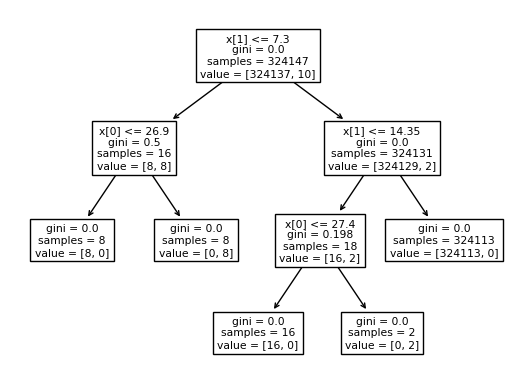

In [8]:
from sklearn.tree import plot_tree

plot_tree(decision_tree_model)

In [ ]:
import pickle

with open("./decision_tree.model", "wb") as model_file:
    model_file.write(pickle.dumps(decision_tree_model))